# Machine Learning

In [1]:
import pandas as pd

reviews_uc = pd.read_csv("polyratings_reviews.csv")
reviews = reviews_uc.drop(reviews_uc[["Unnamed: 0", "Unnamed: 0.1"]], axis = 1) # proper indexing
reviews["review_content"] = reviews["review_content"].fillna("") # accounts for empty reviews

reviews.head()

,class,class_abrv,class_number,review_content,review_month,review_year,student_gpa,student_grade,student_major,student_rank,student_standing,teacher_difficulties,teacher_field,teacher_name,teacher_presentaion,teacher_rating
0,CPE 215,CPE,215,"he knows what he's talking about, he knows how...",Aug,2001,4.0,A,Required (Major),1,Sophomore,3.64,Computer Science,"Connely, John",3.45,3.41
1,CPE 215,CPE,215,"In two years being here at Cal Poly, Dr Connel...",Aug,2001,4.0,A,Required (Major),1,Sophomore,3.64,Computer Science,"Connely, John",3.45,3.41
2,CPE 215,CPE,215,Connely's an excellent professor. I've had hi...,Aug,2001,3.0,B,Required (Major),2,Junior,3.64,Computer Science,"Connely, John",3.45,3.41
3,CPE 215,CPE,215,"This guy knows what he is talking about, and h...",Aug,2001,4.0,A,Required (Major),1,Sophomore,3.64,Computer Science,"Connely, John",3.45,3.41
4,CPE 215,CPE,215,I could go on and on about how great of a teac...,Dec,1999,4.0,A,Required (Support),2,Junior,3.64,Computer Science,"Connely, John",3.45,3.41


## K-Means Clustering of Reviews

In [ ]:
test_set = reviews.sample(frac=.05)

In [3]:
test_set.count()[0]

3251

Using a sample of the data collected because there's an unusually high variety of words. The sample size for our test data-set is twice as long as the Obama Tweets data-set.

In [2]:
from collections import Counter

# creation of bag of words
words = (
    test_set.review_content
    .str.lower()
    .str.replace("[^\w\s]", "") 
    .str.split()
    .apply(Counter)
)

In [3]:
tf = pd.DataFrame(list(words)).fillna(0)

In [7]:
tf_top = tf.sum().sort_values(ascending = False)[:20]
tf_top

the      13885.0
and      10317.0
to        9234.0
a         9168.0
you       7171.0
is        6658.0
i         6273.0
he        5779.0
class     5470.0
of        5428.0
in        4305.0
it        3219.0
that      3214.0
but       3130.0
for       3109.0
this      2867.0
on        2858.0
his       2751.0
she       2688.0
if        2649.0
dtype: float64

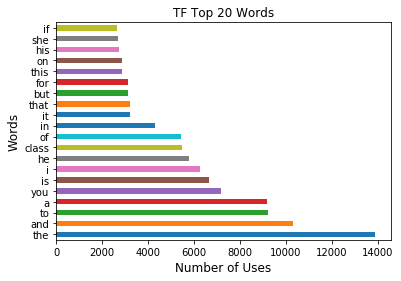

In [9]:
%matplotlib inline

tf_top.plot.barh().set_title("TF Top 20 Words")

plt.xlabel("Number of Uses", fontsize = 12)
plt.ylabel("Words", fontsize = 12)

plt.savefig("img/TF_top.png")

In [10]:
# get tf_idf
import numpy as np

df = (tf > 0).sum(axis=0)
idf = np.log(len(tf) / df)
tf_idf = tf * idf

In [12]:
tf_idf_top = tf_idf.sum().sort_values(ascending = False)[:20]
tf_idf_top

she     3712.339883
he      3397.174669
her     2734.050946
i       2486.817306
his     2425.901703
you     2416.372530
was     2333.511453
that    2240.652849
on      2182.217904
it      2161.696308
of      2117.195953
this    2116.219826
as      2071.480505
are     2016.163654
the     2014.250676
for     2013.843333
not     2008.478428
in      1960.007331
if      1841.856814
to      1831.872496
dtype: float64

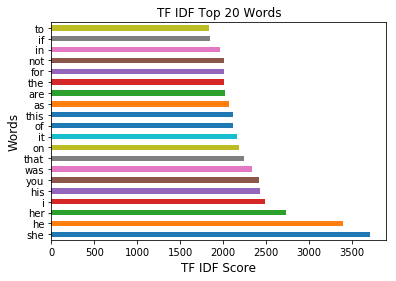

In [13]:
%matplotlib inline

tf_idf_top.plot.barh().set_title("TF IDF Top 20 Words")

plt.xlabel("TF IDF Score", fontsize = 12)
plt.ylabel("Words", fontsize = 12)

plt.savefig("img/TF_IDF_top.png")

In [65]:
(tf_idf.sum() > 10).value_counts()

False    6947
True     6349
dtype: int64

In [66]:
# removes a lot of random words
trunc_idf = tf[tf.columns[tf.sum() > 10]]

In [67]:
from sklearn.cluster import KMeans

# Make cluster from size n = 2 to n = 6

for n in range(2, 7):
    model = KMeans(n_clusters = n)
    model.fit(trunc_idf)
    clusters = model.labels_
    test_set["model_" + str(n)] = clusters       

test_set.to_csv("kmeans_test_set.csv")

### Analysis of Models

** Model 2 **

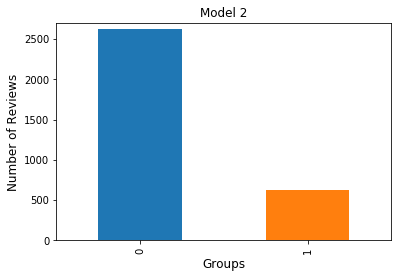

In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

test_set = pd.read_csv("kmeans_test_set.csv")

test_set["model_2"].value_counts().plot.bar().set_title("Model 2")

plt.xlabel("Groups", fontsize = 12)
plt.ylabel("Number of Reviews", fontsize = 12)
plt.ylim(0, 2700)

plt.savefig("img/model_2.png")

In [20]:
for review in test_set.loc[test_set["model_2"] == 0, "review_content"].sample(5):
    print(review)
    print('\n')

Boycott this 


Just putting this under 482, but I've had him for quite a few classes here, and let me say, he is far and away the best teacher that the materials department has. Yes, he is precise, yes, he grades harshly, yes, he can be kind of a dick, but he is a good teacher that will actually teach you things you might need to know further on as an engineer. Take him, be prepared to put in a bit of effort, and you'll be a better engineer because of it.


I looked up Winn on polyratings before spring quarter when I took him and got freaked out because he sounded like a creep, but I am so glad I took him because he is not--at all! Winn is a good teacher, and overall this was a great class. As long as you follow guidelines you can get an A. Just make sure you have structure and organization...and even if you have differing opinions he will still give you a good grade if you present your information clearly and reasonably. He wants to hear what students have to say, even if it is diffe

Group 0:

1. spam
2. good, practical class
3. good despite negative expectations
4. not that practical, sort of difficult, ultimately good
5. worst teacher taken

ultimately positive

In [19]:
for review in test_set.loc[test_set["model_2"] == 1, "review_content"].sample(5):
    print(review)
    print('\n')

Okay so the work load is not much compared to some other professors. I was surprised how hard she graded us on our speeches considering that she wasn't a perfect speaker herself. I constantly got marked down for glancing at my notes (which we were allowed to have) and I asked my classmates if I really was reading off of my paper. My classmates told me that I did well and that I barely looked at my paper. Whenever Prof. Jackson is speaking she is either looking down at her paper, fiddling with something in her hand, or looking up at the ceiling. Not to mention the fact that this is a SPEAKING class and I did well on my speeches, I got a B on the written final which bumped my grade down. If it's a public speaking class, the WRITTEN final shouldn't be 30% of the grade. All of that aside, she was never at her office hours when I went so that was a minus. If you're looking for less work, take Lorraine, but know that you might not end up with the grade you think you deserved. 


This guy can

Group 1:

1. harsh grader, not available for office hours
2. inbetween (kind of hard)
3. good for hard workers
4. negative review (a lot of work)
5. teacher knows a lot of stuff, kind of hard

generally more negative

** Model 3 **

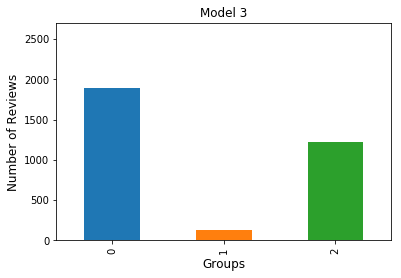

In [17]:
test_set["model_3"].value_counts().sort_index().plot.bar().set_title("Model 3")

plt.xlabel("Groups", fontsize = 12)
plt.ylabel("Number of Reviews", fontsize = 12)
plt.ylim(0, 2700)

plt.savefig("img/model_3.png")

In [23]:
for review in test_set.loc[test_set["model_3"] == 0, "review_content"].sample(5):
    print(review)
    print('\n')

He explains the course materials clearly, his polylearn is organized, his chapter summaries are very helpful, the videos he post on polylearn are also helpful, his homework is good for learning and reviewing but at the same time it does not compromises the students time and his class is funny.I am a fan!


Honestly Grandpa Mike is a homie. He definitely grades girls more easily, is candid about the fact that he's a Jesus loving conservative (I'm a Bay Area liberal) and has read more books in the last month than any of us have read in our lives. He's nutty and makes you email him (a plus for me but potentially a minus for others) and the good thing for me was he didn't set a minimum length for any speeches, just a maximum, and general suggestion. Earning his respect was a good feeling. 


Highly recommended fun class (with work, though)!  If you're interested in reading and writing short stories, you will learn a lot.  I'm an OK writer, but I learned so much about short stories.  This c

Group 0:

1. good, well organized
2. good
3. a lot of readings, but good class
4. kind of inbetween
5. difficult, very negative review

Summary: Pretty Good

In [30]:
for review in test_set.loc[test_set["model_3"] == 1, "review_content"].sample(5):
    print(review)
    print('\n')

This class is your average GE history class. Dr. Hall spends every class period lecturing off power point slides. At times the class is mildly interesting, but on other days the material can be quite dry. He doesn't follow a textbook, which means you learn his, somewhat subjective version of history. With that said, I know a lot more about US history than I did prior to the class. In this class, your grade is made up of: 3 multiple choice exams (75Pts each), a noncumulative final (125pts) and an optional write up (50pts). In my opinion, the exams are fairly straightforward and easy. However, Dr. Hall likes to throw in about ~10 subjective/ambiguous or poorly phrased questions on each exam. Luckily, each exam has extra credit points and the 3rd exam is take home! For the final, there is a large essay portion as well as a multiple choice portion. The final is now CLOSED notes, but Dr. Hall prepares you well for the essay portion! The optional write-up will expand your course total from 3

Group 1:

1. kind of indifferent; typical GE
2. difficult, but good teacher
3. great teacher for difficult class
4. praises the class, but explicit language and a bit tactless
5. negative review (but not 

a bit more negative; inconclusive

In [32]:
for review in test_set.loc[test_set["model_3"] == 2, "review_content"].sample(5):
    print(review)
    print('\n')

This class was an easy A. Two exams which are both take home and one project presentation that we were allowed to pick any aquaculture related  topic. He took attendance most days when people stopped showing up to class, but I'm not sure if he even used them for points. He is very unorganized, but just make sure you stay on top of things like your grade and you'll do great. The class is pretty boring but its a good/easy GE Area F. First half of the quarter is basically lecture and education videos. Second half of quarter is purely project presentations. He's just a sweet old Hawaiian man who brought us salmon toward the end of the quarter. He also offered extra credit if you really need it! 


Really nice lady but not a great professor.  Has difficulty presenting the material and gets lost on the board sometimes.  You won't be screwed if you get her but you should know that it will be a lot of work on your part to do well.  Do all of the reading before lecture because it will clarify h

Group 2:

1. 
3. good review

Inconclusive

** Model 4 **

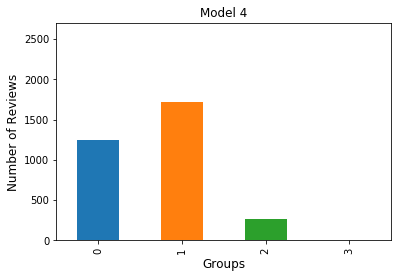

In [18]:
test_set["model_4"].value_counts().sort_index().plot.bar().set_title("Model 4")

plt.xlabel("Groups", fontsize = 12)
plt.ylabel("Number of Reviews", fontsize = 12)
plt.ylim(0, 2700)

plt.savefig("img/model_4.png")

In [9]:
for review in test_set.loc[test_set["model_4"] == 0, "review_content"].sample(5):
    print(review)
    print('\n')

Professor Fraizer was a wonderful teacher! I had a really hard time grasping the concepts in the beginning and failed 2 of my quizzes and did poorly on my first exam. However, I went into office hours and did a lot of studying and was able to bump my grade up to a B! Fraizer's questions on quizzes and exams are relatively hard but after you get the hang of the structure you'll do fine. At the end of the quarter he gave a project worth 20% of your grade (making a blog about an endangered species) and just as long as you show effort and include what he specifies then you'll get all of the points. He's a really caring teacher and wants all of his students to succeed. He is also able to explain the material much better during his office hours. 


He really is not a good professor. However, he curves the class A LOT because no one understands the material. Go to the class to do your classwork problems and you will be fine. I got C+ on both midterms and a D- on the final and got a B+ in the 

Group 0:
1. TAKE THIS GUY!
2. easy class, despite bad reviews 

** Model 5 **

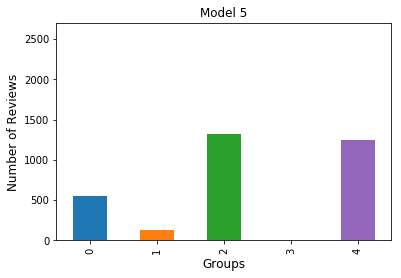

In [19]:
test_set["model_5"].value_counts().sort_index().plot.bar().set_title("Model 5")

plt.xlabel("Groups", fontsize = 12)
plt.ylabel("Number of Reviews", fontsize = 12)
plt.ylim(0, 2700)

plt.savefig("img/model_5.png")

In [33]:
for review in test_set.loc[test_set["model_5"] == 0, "review_content"].sample(5):
    print(review)
    print('\n')

If you have a basic knowledge of calculus, then take this guy.  He is not a great teacher, but his grading system rules!  If you do the homework that he assigns then you should do fine.  All you need is like a 54% to get a C in his class.  He has a set curve on his tests.  I got a 44% on one of my tests, and he curved it to a 68, which was a C+ in his class.  He gives a test in the library, and he has hint days the day before, in which he gives you the exact type of question that will be on the test, just with different numbers.  On top of all that, he lets you use a notecard on the tests, and a full sheet of paper on the final.  Beware of his final though, it is very hard.  You have to study hard for the final, but he is worth taking.


Some of the material covered in ECON 330 was hard however, other parts of the class were extremely easy. Professor Fisher is a good professor and I would recommend taking his class. Be ready to be called on in class. His lectures are very engaging in t

In [34]:
for review in test_set.loc[test_set["model_5"] == 1, "review_content"].sample(5):
    print(review)
    print('\n')

I had his class for Econ 201.  All he did was taking the materials out of the text.  And during that quarter that I had him we had a beginning Spanish class across from the hall.  At the beginning of every class he would say something about how the people in the Spanish class wasn't good.  And he keep saying, "I am not trying to impress you with my Spanish, learning another language is a good thing."  Over all his class is easy, if you come to class, watch the slides, and read the text.  But he waste so much time on the slides on our class, he had to drop out two chapters because he could not finish teaching all the materials he is suppose to.  Also he was so nice to us on the day we had to do our in class evulation, at the first I just thought he had a good day and was being nice.  Because he actually look at me when he was talking to me, most of the time he would just look at someone else's face (I sit in the front of the class).  But he just want you to write something nice about hi

In [35]:
for review in test_set.loc[test_set["model_5"] == 2, "review_content"].sample(5):
    print(review)
    print('\n')

Gary Perks is a great teacher. He clearly explains the material. The tests are not easy you really have to know what you are doing and do the homework even though he doesn't collect or grade homework. He is very nice and helpful if asked. I have had a hard time understanding EE but I know it would be much worse if Gary weren't there to explain things.


Melanie was such a horrible teacher.  She came in late to every lab and did not teach us anything.  She would sit there and after ten minute  s would tell us to keep working on our packaging projects.  She did not instuct us and she did not tell us what to do in detail.  Plus she was really anal when it came to grading our labs final report.  While Pennys class had higher grades since she wasn't too particular.  Plus you will just spend the whole time starring at Melanie and wondering why her jaw is so messed up.  This is the first time I have complained about a teacher, but she was just  so bad.  I would recommend Penny or some other t

** Model 6 **

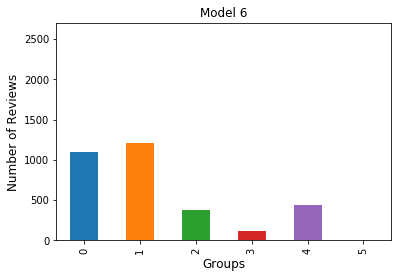

In [20]:
test_set["model_6"].value_counts().sort_index().plot.bar().set_title("Model 6")

plt.xlabel("Groups", fontsize = 12)
plt.ylabel("Number of Reviews", fontsize = 12)
plt.ylim(0, 2700)

plt.savefig("img/model_6.png")

### Auto-Moderator Learning Model (K-nearest neighbors)

Factors Used in the Model (X):
- review_content (in the form of TF-IDF words)
- class_abv (varies by major)
- class_number (difficulty increases over time)
- student_standing 

Predicting (Y):
- category of message (spam / un-useful / regular)

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

** Using K-Nearest Neighbors **

In [75]:
def get_Kneighbors_test_error(k):
    scaler = StandardScaler()
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline([('transform', scaler), ('fit', model)])
    return np.sqrt(np.abs(cross_val_score(pipeline, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean()))

In [76]:
ks = pd.Series(range(1, 51, 1))
ks.index = ks

k_cross_val = ks.apply(get_Kneighbors_test_error)

In [ ]:
k_cross_val.plot()
k_cross_val.idxmin()